**MLP in ANN**

This works directly on your extracted features (X) and fits perfectly into your existing pipeline

X shape: (39418, 512)
Number of classes: 16


C:\Users\YV\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 16)             │           528 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 77,424 (302.44 KB)

 Trainable params: 76,976 (300.69 KB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/50
690/690 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5754 - loss: 1.7054 - val_accuracy: 0.7982 - val_loss: 0.8843
Epoch 2/50
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7296 - loss: 1.0908 - val_accuracy: 0.8239 - val_loss: 0.7142
Epoch 3/50
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7792 - loss: 0.9052 - val_accuracy: 0.8483 - val_loss: 0.6291
Epoch 4/50
690/690 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7943 - loss: 0.8214 - val_accuracy: 0.8531 - val_loss: 0.5855
Epoch 5/50
690/690 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8056 - loss: 0.7620 - val_accuracy: 0.8590 - val_loss: 0.5569
Epoch 6/50
690/690 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8158 - loss: 0.7294 - val_accuracy: 0.8608 - val_loss: 0.5508
Epoch 7/50
690/690 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8237 - loss: 0.6942 - val_accuracy: 0.8708 - val_loss: 0.5268
Epoch 8/50
690/690 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8267 - loss: 0.6842 - val_accuracy: 0.

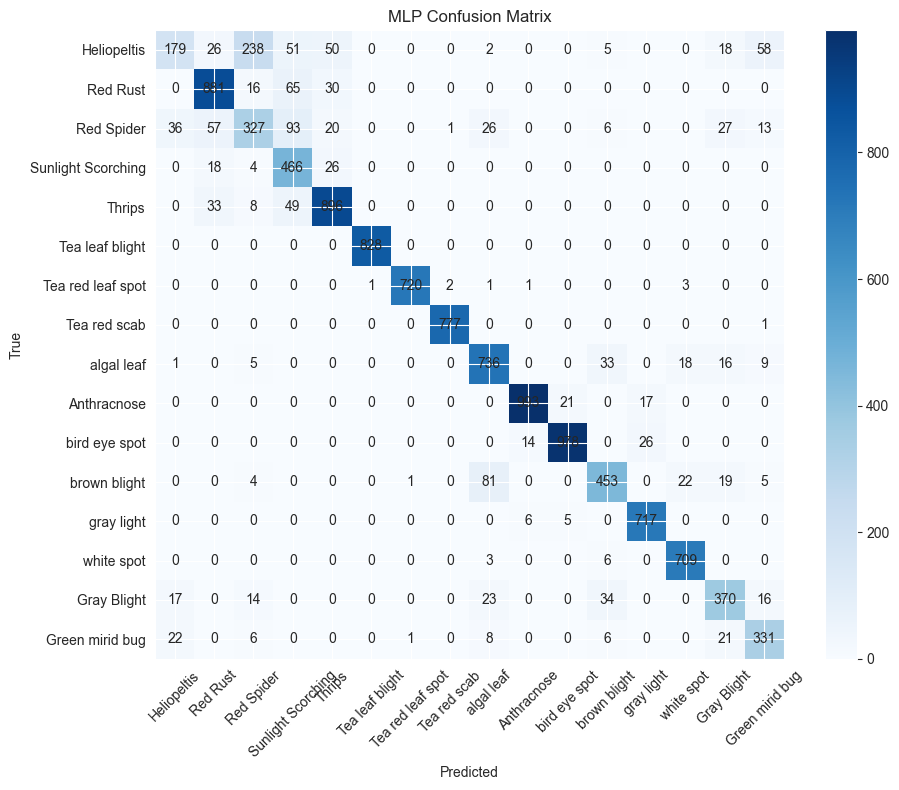

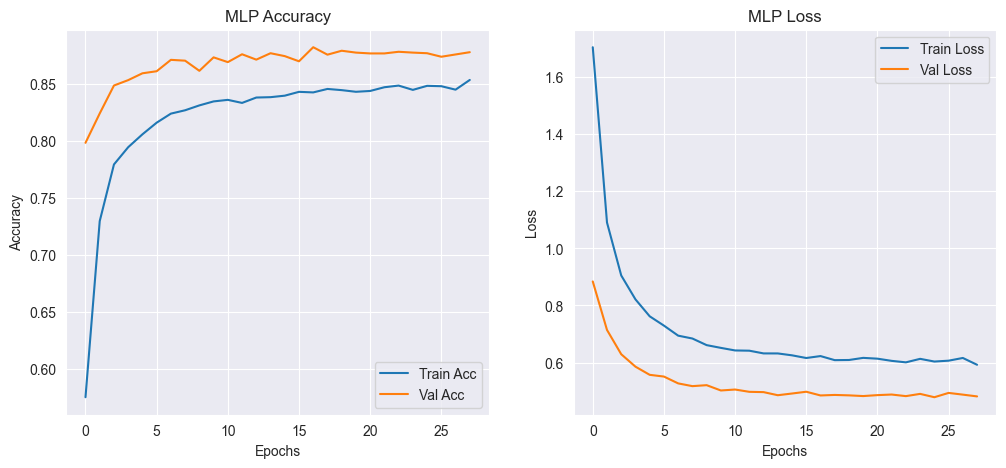

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

# -----------------------------
# Load Features & Labels
# -----------------------------
data_path = Path(r'D:\YV\DSGP-IIT\disease and pest detection')

X = np.load(data_path / 'extracted_features_X.npy')
y = np.load(data_path / 'extracted_labels_y.npy')
class_map = np.load(data_path / 'class_mapping.npy', allow_pickle=True).item()

index_to_class = {v: k for k, v in class_map.items()}
class_names = [index_to_class[i] for i in sorted(index_to_class)]
NUM_CLASSES = len(class_names)

print("X shape:", X.shape)
print("Number of classes:", NUM_CLASSES)

# -----------------------------
# Train / Test Split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

# -----------------------------
# Feature Scaling
# -----------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -----------------------------
# One-Hot Encode Labels
# -----------------------------
y_train_oh = to_categorical(y_train, NUM_CLASSES)
y_test_oh = to_categorical(y_test, NUM_CLASSES)

# -----------------------------
# Build the MLP Model
# -----------------------------
model = Sequential([
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001),
          input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.5),

    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    Dropout(0.4),

    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(NUM_CLASSES, activation='softmax')
])

model.summary()

# -----------------------------
# Compile Model
# -----------------------------
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# -----------------------------
# Early Stopping
# -----------------------------
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,  # stricter to stop earlier
    restore_best_weights=True
)

# -----------------------------
# Train Model
# -----------------------------
history = model.fit(
    X_train_scaled,
    y_train_oh,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# -----------------------------
# Evaluate Model
# -----------------------------
test_loss, test_acc = model.evaluate(X_test_scaled, y_test_oh, verbose=0)
print(f"MLP Test Accuracy: {test_acc:.4f}")

# -----------------------------
# Classification Report
# -----------------------------
y_pred_prob = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_prob, axis=1)

print(classification_report(
    y_test,
    y_pred,
    target_names=class_names,
    zero_division=0
))

# -----------------------------
# Confusion Matrix
# -----------------------------
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,8))
plt.imshow(cm, cmap='Blues')
plt.title("MLP Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.colorbar()

plt.xticks(range(NUM_CLASSES), class_names, rotation=45)
plt.yticks(range(NUM_CLASSES), class_names)

for i in range(NUM_CLASSES):
    for j in range(NUM_CLASSES):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.tight_layout()
plt.show()

# -----------------------------
# Training Curves
# -----------------------------
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("MLP Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("MLP Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

# -----------------------------
# Save the Model
# -----------------------------
model.save("mlp_tea_leaf_disease_model.h5")


**CNN**

used MobileNetV2 pre trained model

Found 7690 images belonging to 16 classes.
Found 1915 images belonging to 16 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 160, 160,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 80, 80,    │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 80, 80,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 80, 80,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 80, 80,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 80, 80,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 80, 80,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 80, 80,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 80, 80,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 80, 80,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 80, 80,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 80, 80,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 81, 81,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 40, 40,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 40, 40,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 40, 40,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 40, 40,    │      2,304 │ block_1_depthwis

 Total params: 2,424,016 (9.25 MB)

 Trainable params: 166,032 (648.56 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/20
241/241 ━━━━━━━━━━━━━━━━━━━━ 122s 497ms/step - accuracy: 0.3658 - loss: 2.4961 - val_accuracy: 0.5232 - val_loss: 2.1320 - learning_rate: 1.0000e-04
Epoch 2/20
241/241 ━━━━━━━━━━━━━━━━━━━━ 115s 479ms/step - accuracy: 0.5322 - loss: 2.0118 - val_accuracy: 0.5384 - val_loss: 1.9999 - learning_rate: 1.0000e-04
Epoch 3/20
241/241 ━━━━━━━━━━━━━━━━━━━━ 114s 473ms/step - accuracy: 0.5839 - loss: 1.8761 - val_accuracy: 0.5478 - val_loss: 1.9488 - learning_rate: 1.0000e-04
Epoch 4/20
241/241 ━━━━━━━━━━━━━━━━━━━━ 112s 464ms/step - accuracy: 0.6185 - loss: 1.7776 - val_accuracy: 0.5593 - val_loss: 1.9261 - learning_rate: 1.0000e-04
Epoch 5/20
241/241 ━━━━━━━━━━━━━━━━━━━━ 114s 474ms/step - accuracy: 0.6390 - loss: 1.7069 - val_accuracy: 0.5608 - val_loss: 1.9080 - learning_rate: 1.0000e-04
Epoch 6/20
241/241 ━━━━━━━━━━━━━━━━━━━━ 113s 468ms/step - accuracy: 0.6622 - loss: 1.6557 - val_accuracy: 0.5671 - val_loss: 1.9003 - learning_rate: 1.0000e-04
Epoch 7/20
241/241 ━━━━━━━━━━━━━━━━━━━━ 

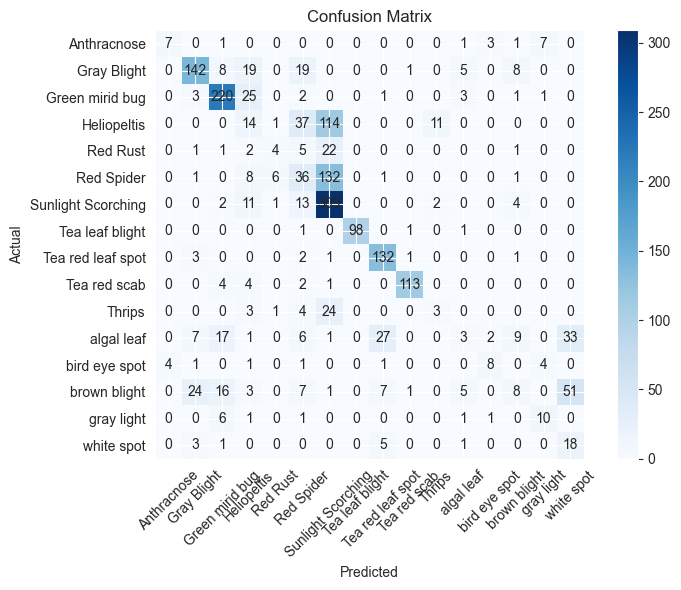

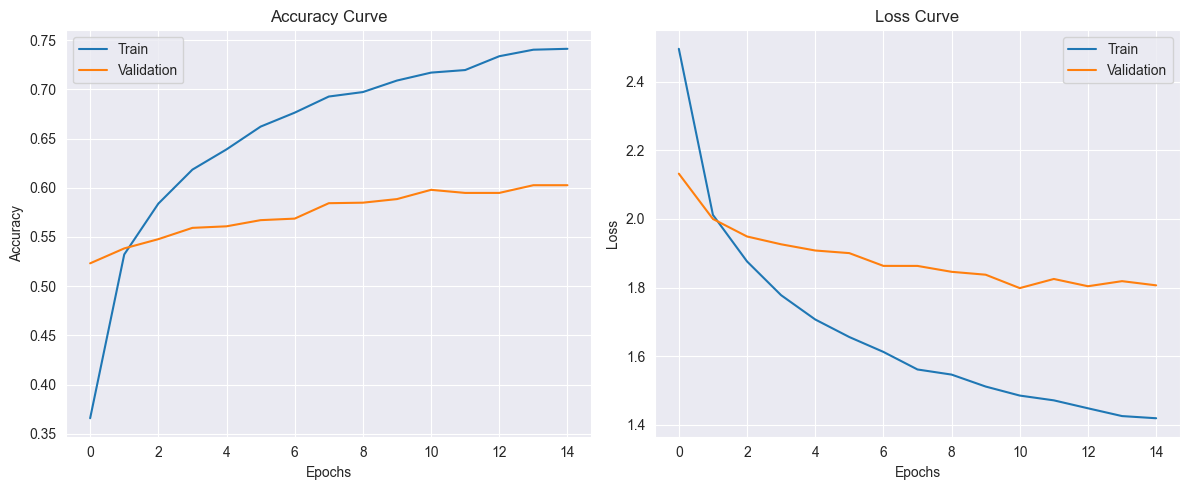

Model saved as mobilenetv2_fast_safe.h5


In [1]:
# =========================================================
# Imports
# =========================================================
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.losses import CategoricalCrossentropy

# =========================================================
# Dataset & Parameters (FAST)
# =========================================================
data_path = Path(r'D:\YV\DSGP-IIT\disease and pest detection\All Collected Dataset')

IMG_SIZE = (160, 160)     # Faster than 224
BATCH_SIZE = 32
EPOCHS = 15

# =========================================================
# Data Augmentation (ANTI-OVERFITTING)
# =========================================================
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

train_gen = datagen.flow_from_directory(
    data_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_gen = datagen.flow_from_directory(
    data_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

NUM_CLASSES = train_gen.num_classes
class_names = list(train_gen.class_indices.keys())

print("Classes:", class_names)

# =========================================================
# MobileNetV2 (FROZEN BACKBONE)
# =========================================================
base_model = MobileNetV2(
    input_shape=(160,160,3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False

# =========================================================
# Custom Head (REDUCED CAPACITY)
# =========================================================
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(64, activation='relu', kernel_regularizer=l2(0.002))(x)
x = Dropout(0.6)(x)
outputs = Dense(NUM_CLASSES, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=outputs)
model.summary()

# =========================================================
# Compile
# =========================================================
model.compile(
    optimizer=Adam(learning_rate=5e-5),
    loss=CategoricalCrossentropy(label_smoothing=0.1),
    metrics=['accuracy']
)

# =========================================================
# Callbacks
# =========================================================
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=4,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.3,
    patience=2,
    min_lr=1e-6
)

# =========================================================
# Train
# =========================================================
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

# =========================================================
# Evaluation
# =========================================================
val_loss, val_acc = model.evaluate(val_gen, verbose=0)
print(f"Validation Accuracy: {val_acc:.4f}")

y_true = val_gen.classes
y_pred = np.argmax(model.predict(val_gen), axis=1)

print(classification_report(
    y_true,
    y_pred,
    target_names=class_names,
    zero_division=0
))

# =========================================================
# Confusion Matrix
# =========================================================
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
plt.imshow(cm, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()
plt.xticks(range(NUM_CLASSES), class_names, rotation=45)
plt.yticks(range(NUM_CLASSES), class_names)

for i in range(NUM_CLASSES):
    for j in range(NUM_CLASSES):
        plt.text(j, i, cm[i, j], ha='center', va='center')

plt.tight_layout()
plt.show()

# =========================================================
# Learning & Loss Curves
# =========================================================
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title("Accuracy Curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# =========================================================
# Save Model
# =========================================================
model.save("mobilenetv2_fast_safe_final.h5")
print("Model saved as mobilenetv2_fast_safe_final.h5")
